In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("../input/train.csv")
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [4]:
df.columns

Index(['id', 'feat_1', 'feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6',
       'feat_7', 'feat_8', 'feat_9', 'feat_10', 'feat_11', 'feat_12',
       'feat_13', 'feat_14', 'feat_15', 'feat_16', 'feat_17', 'feat_18',
       'feat_19', 'feat_20', 'feat_21', 'feat_22', 'feat_23', 'feat_24',
       'feat_25', 'feat_26', 'feat_27', 'feat_28', 'feat_29', 'feat_30',
       'feat_31', 'feat_32', 'feat_33', 'feat_34', 'feat_35', 'feat_36',
       'feat_37', 'feat_38', 'feat_39', 'feat_40', 'feat_41', 'feat_42',
       'feat_43', 'feat_44', 'feat_45', 'feat_46', 'feat_47', 'feat_48',
       'feat_49', 'feat_50', 'feat_51', 'feat_52', 'feat_53', 'feat_54',
       'feat_55', 'feat_56', 'feat_57', 'feat_58', 'feat_59', 'feat_60',
       'feat_61', 'feat_62', 'feat_63', 'feat_64', 'feat_65', 'feat_66',
       'feat_67', 'feat_68', 'feat_69', 'feat_70', 'feat_71', 'feat_72',
       'feat_73', 'feat_74', 'feat_75', 'feat_76', 'feat_77', 'feat_78',
       'feat_79', 'feat_80', 'feat_81', 'feat_82', 'fe

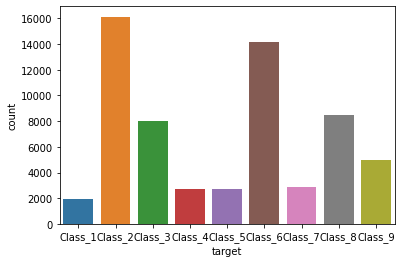

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="target", data=df)
plt.show()

In [6]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       61878 non-null  int64 
 1   feat_1   61878 non-null  int64 
 2   feat_2   61878 non-null  int64 
 3   feat_3   61878 non-null  int64 
 4   feat_4   61878 non-null  int64 
 5   feat_5   61878 non-null  int64 
 6   feat_6   61878 non-null  int64 
 7   feat_7   61878 non-null  int64 
 8   feat_8   61878 non-null  int64 
 9   feat_9   61878 non-null  int64 
 10  feat_10  61878 non-null  int64 
 11  feat_11  61878 non-null  int64 
 12  feat_12  61878 non-null  int64 
 13  feat_13  61878 non-null  int64 
 14  feat_14  61878 non-null  int64 
 15  feat_15  61878 non-null  int64 
 16  feat_16  61878 non-null  int64 
 17  feat_17  61878 non-null  int64 
 18  feat_18  61878 non-null  int64 
 19  feat_19  61878 non-null  int64 
 20  feat_20  61878 non-null  int64 
 21  feat_21  61878 non-null  int64 
 22

In [7]:
from sklearn import preprocessing

lbl_enc = preprocessing.LabelEncoder()
df.loc[:, "target"] = lbl_enc.fit_transform(df.loc[:, "target"].values)

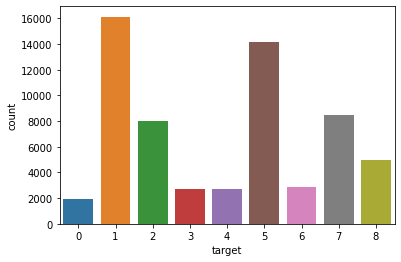

In [8]:
sns.countplot(x="target", data=df)
plt.show()

In [9]:
from sklearn import model_selection

df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True)
y = df.target.values

skf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X=df, y=y)):
    df.loc[val_idx, "kfold"] = fold

df.to_csv("../input/train_folds.csv", index=False)

In [10]:
df = pd.read_csv("../input/train_folds.csv")
df.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target,kfold
0,50159,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,7,0
1,30157,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,4,0
2,16022,4,0,0,0,0,0,0,0,0,...,1,0,6,1,1,0,0,0,1,0
3,2560,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,17890,1,0,0,0,0,0,1,0,1,...,1,0,3,0,3,0,0,0,1,0


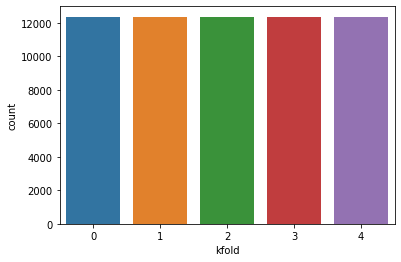

In [11]:
sns.countplot(x="kfold", data=df)
plt.show()

In [12]:
from sklearn import tree
from sklearn import metrics

def train(fold):
    df = pd.read_csv("../input/train_folds.csv")
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop(columns=["id", "target"], axis=1).values
    ytrain = df_train.target.values
    
    xvalid = df_valid.drop(columns=["id", "target"], axis=1).values
    yvalid = df_valid.target.values
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(xtrain, ytrain)
    preds = clf.predict(xvalid)
    
    accuracy = metrics.accuracy_score(yvalid, preds)
    print(f"Fold={fold}, Accuracy={accuracy:.3f}")
    
    #matrix = metrics.confusion_matrix(yvalid, preds)
    #report = metrics.classification_report(yvalid, preds)

In [13]:
for j in range(5):
    train(j)

Fold=0, Accuracy=0.7098
Fold=1, Accuracy=0.7110
Fold=2, Accuracy=0.7108
Fold=3, Accuracy=0.7093
Fold=4, Accuracy=0.7118


In [14]:
test = pd.read_csv("../input/test.csv")
sub = pd.read_csv("../input/sampleSubmission.csv")

In [15]:
test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [16]:
sub.head()

,id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
0,1,1,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0


In [54]:
def eval():
    train = pd.read_csv("../input/train.csv")
    test = pd.read_csv("../input/test.csv")
    sub = pd.read_csv("../input/sampleSubmission.csv")
    
    lbl_enc = preprocessing.LabelEncoder()
    train.loc[:, "target"] = lbl_enc.fit_transform(train.loc[:, "target"].values)
    
    xtrain = train.drop(columns=["id", "target"], axis=1).values
    ytrain = train.target.values
    
    test = test.drop(columns=["id"], axis=1).values
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(xtrain, ytrain)
    
    preds = clf.predict_proba(test)
    
    preds = pd.DataFrame(
        preds, 
        index=sub.id.values, 
        columns=sub.columns[1:]
    )
    
    #preds.to_csv("../input/preds.csv", index_label="id")
    #print("output prediction file...")
    print(preds)

In [55]:
eval()

output prediction file...


In [ ]:
from sklearn import decomposition
import numpy as np

def pca():
    df = pd.read_csv("../input/train.csv")
    
    xtrain = df.drop(columns=["id", "target"], axis=1).values
    ytrain = df.target.values
    
    pca = decomposition.PCA(n_components=2)
    pca.fit(xtrain)
    train_2D_pca = pca.fit_transform(xtrain)
    
    label_color_dict = {
        label:idx for idx, label in enumerate(np.unique(ytrain))
    }
    
    c_vec = [label_color_dict[label] for label in ytrain]
    
    plt.figure (figsize=(30, 30))
    sns.scatterplot(
        x=train_2D_pca[:, 0], 
        y=train_2D_pca[:, 1],
        hue=c_vec
    )
    
    plt.legend(fontsize=30)

In [ ]:
pca()

In [50]:
from sklearn import manifold

def tsne():
    df = pd.read_csv("../input/train.csv")
    
    xtrain = df.drop(columns=["id", "target"], axis=1).values
    ytrain = df.target.values
    
    tsne = manifold.TSNE(n_components=2, random_state=2020)
    train_2D_tsne = tsne.fit_transform(xtrain)
    
    label_color_dict = {
        label:idx for idx, label in enumerate(np.unique(ytrain))
    }
    
    c_vec = [label_color_dict[label] for label in ytrain]
    
    plt.figure (figsize=(30, 30))
    sns.scatterplot(
        x=train_2D_tsne[:, 0], 
        y=train_2D_tsne[:, 1],
        hue=c_vec
    )
    
    plt.legend(fontsize=30)

In [ ]:
tsne()

In [19]:
import shap

def shapley_value():
    train = pd.read_csv("../input/train.csv")
    
    lbl_enc = preprocessing.LabelEncoder()
    train.loc[:, "targeI t"] = lbl_enc.fit_transform(train.loc[:, "target"].values)
    
    xtrain = train.drop(columns=["id", "target"], axis=1).values
    ytrain = train.target.values
        
    clf = tree.DecisionTreeClassifier()
    clf.fit(xtrain, ytrain)
    
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(xtrain)
    
    shap.summary_plot(shap_values[1], xtrain) 

In [28]:
shapley_value()

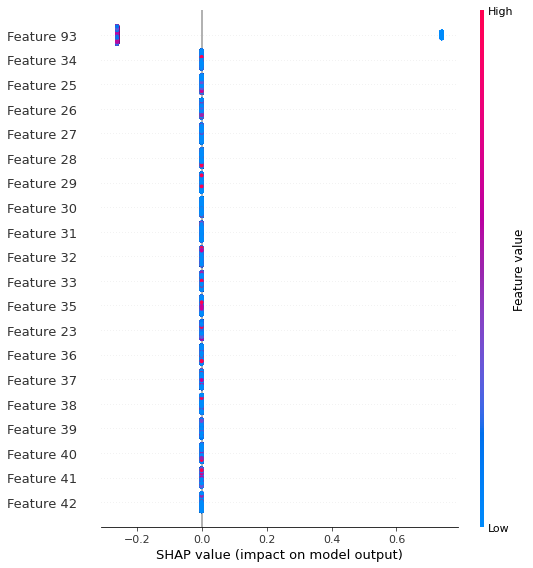

In [29]:
import lightgbm as lgb

def train_lgb(fold):
    df = pd.read_csv("../input/train_folds.csv")
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop(columns=["id", "target"], axis=1).values
    ytrain = df_train.target.values
    
    xvalid = df_valid.drop(columns=["id", "target"], axis=1).values
    yvalid = df_valid.target.values
    
    clf = lgb.LGBMClassifier()
    clf.fit(xtrain, ytrain)
    preds = clf.predict(xvalid)
    
    accuracy = metrics.accuracy_score(yvalid, preds)
    print(f"Fold={fold}, Accuracy={accuracy:.3f}")


In [ ]:
for j in range(5):
    train_lgb(j)

In [ ]:
import optuna

def train_lgb_opt(fold, params, save_model=False):
    df = pd.read_csv("../input/train_folds.csv")
    
    df_train = df[df.kfold != fold].reset_index(drop=True)
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = df_train.drop(columns=["id", "target"], axis=1).values
    ytrain = df_train.target.values
    
    xvalid = df_valid.drop(columns=["id", "target"], axis=1).values
    yvalid = df_valid.target.values
    
    clf = lgb.LGBMClassifier(
        objective=params["objective"],
        metric=params["metric"],
        verbosity=params["verbosity"],
        boosting_type=params["boosting_type"],
        lambda_l1=params["lambda_l1"],
        lambda_l2=params["lambda_l2"],
        num_leaves=params["num_leaves"],
        feature_fraction=params["feature_fraction"],
        bagging_fraction=params["bagging_fraction"],
        bagging_freq=params["bagging_freq"],
        min_child_samples=params["min_child_samples"],
    )
    clf.fit(xtrain, ytrain)
    preds = clf.predict(xvalid)
    accuracy = metrics.accuracy_score(yvalid, preds)
    
    return accuracy

def objective(trial):
    params = {
        "objective": "multiclass",
        "metric": "multi_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }
    
    all_accuracy = []
    for f_ in range(5):
        temp_accuracy = train_lgb_opt(f_, params, save_model=False)
        all_accuracy.append(temp_accuracy)
    
    return np.mean(all_accuracy)


In [ ]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

print("Best trial:")
trial_ = study.best_trial

print(f"Value: {trial_.values}")
print(f"Params: {trial_.params}")

scores = 0
for j in range(5):
    scr = train_lgb_opt(j, trial_.params, save_model=True)
    scores += scr
    
print(scores / 5)
